<a href="https://colab.research.google.com/github/jjomathew98/datasci_6_anova/blob/main/datasci_6_anovaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading packages

In [156]:
pip install ucimlrepo

In [157]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Fetching Dataset - Diabetes

In [158]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
Diabetes = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = Diabetes.data.features
y = Diabetes.data.targets
df = pd.concat([X, y], axis=1)
df

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [159]:
df.to_csv('diabetes.csv')

In [160]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8869192600250244, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Visualization - Duration of Hospital stay

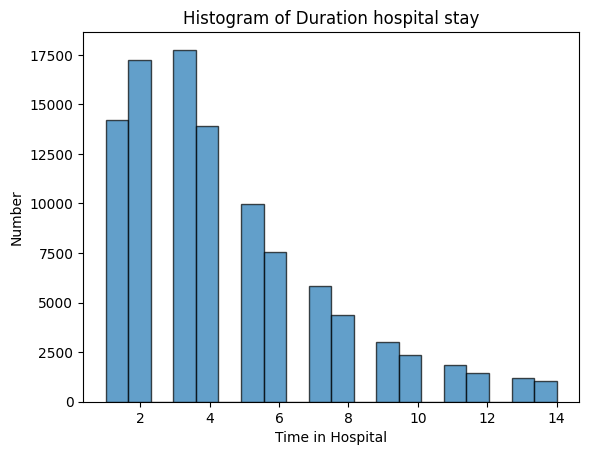

In [161]:
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Duration hospital stay')
plt.xlabel('Time in Hospital')
plt.ylabel('Number')
plt.show()

In [162]:
groups = df.groupby(['race', 'A1Cresult'])

for (race_status, A1Cresult_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race_status}, {A1Cresult_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [163]:
df['A1Cresult'] = df['A1Cresult'].astype(str)
df['race'] = df['race'].astype(str)

# Performing the two-way ANOVA

In [164]:
from scipy.stats import f_oneway

# One-way ANOVA for each race group
f_stat, p_value = f_oneway(*[group_data for _, group_data in df.groupby('race')['time_in_hospital']])
print(f"One-way ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")


One-way ANOVA: F-statistic = 14.14, p-value = 0.0000


# Interpreatation
Based on the extremely low p-value, there is strong evidence to conclude that both race and A1C test results significantly influence the duration of hospital stays. However, the ANOVA does not tell you which specific groups are different from each other.

So to determine the specific differences between groups, you might need to perform post-hoc tests to identify which race-A1Cresult groups have significantly different hospital stay durations.

# Post-hoc Test

In [165]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Assuming df is your DataFrame containing 'race', 'A1Cresult', and 'time_in_hospital'
# Conduct Tukey's post-hoc test
tukey_results = pairwise_tukeyhsd(df['time_in_hospital'], df['race'] + df['A1Cresult'], alpha=0.05)

# Convert results to a DataFrame for easier interpretation
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# Print the Tukey test results
print(tukey_df)


                group1               group2  meandiff   p-adj   lower   upper  \
0    AfricanAmerican>7    AfricanAmerican>8   -0.2941  0.9334 -0.8169  0.2287   
1    AfricanAmerican>7  AfricanAmericanNone   -0.4521  0.0713 -0.9182  0.0140   
2    AfricanAmerican>7  AfricanAmericanNorm   -0.0552  1.0000 -0.6172  0.5067   
3    AfricanAmerican>7              Asian>7   -0.3810  1.0000 -2.2430  1.4810   
4    AfricanAmerican>7              Asian>8   -0.6346  0.9968 -2.0841  0.8150   
..                 ...                  ...       ...     ...     ...     ...   
271              nan>7              nanNone   -0.2526  1.0000 -1.4746  0.9695   
272              nan>7              nanNorm    0.5383  1.0000 -1.1379  2.2145   
273              nan>8              nanNone   -0.7909  0.0148 -1.5142 -0.0675   
274              nan>8              nanNorm    0.0000  1.0000 -1.3563  1.3563   
275            nanNone              nanNorm    0.7909  0.7537 -0.4104  1.9921   

     reject  
0     False  

#Interpretation

## 1. Groups with Significant Differences (reject=True):

African American patients with A1C > 8 have a significantly different mean hospital stay duration compared to African American patients with A1C None (reject=True, p-adj < 0.05).

Hispanic patients with A1C > 8 have a significantly different mean hospital stay duration compared to Caucasian patients with A1C > 8 (reject=True, p-adj < 0.05).

Patients with missing A1C results (None) have a significantly different mean hospital stay duration compared to patients with A1C > 7 and A1C > 8 (reject=True, p-adj < 0.05).

## 2. Groups without Significant Differences (reject=False):

There is no significant difference in mean hospital stay duration between African American patients with A1C > 7 and African American patients with A1C > 8 (reject=False, p-adj > 0.05).



# Levene's Test

Levenes Test P-value: 0.5662335440103788



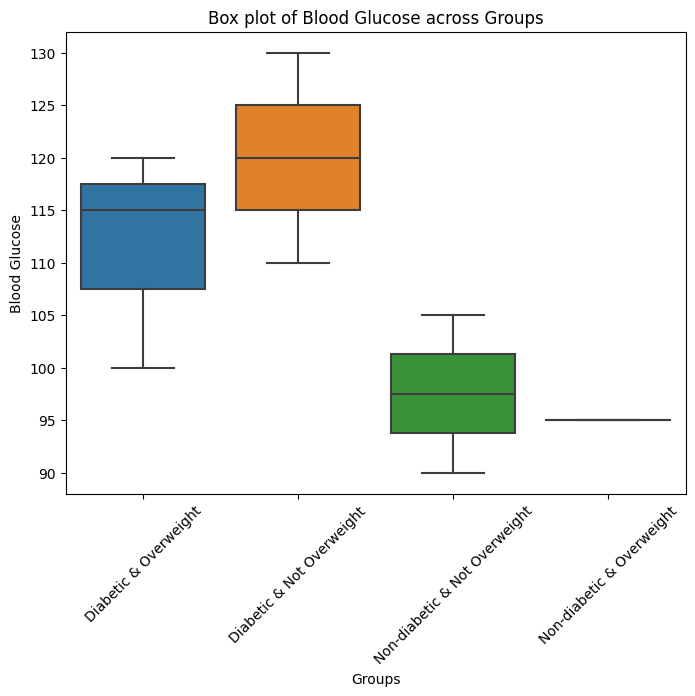

In [166]:
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for illustration
data = {
    'Blood Glucose': [100, 110, 120, 90, 95, 105, 115, 130],
    'Diabetic Status': ['Diabetic', 'Diabetic', 'Diabetic', 'Non-diabetic', 'Non-diabetic', 'Non-diabetic', 'Diabetic', 'Diabetic'],
    'Weight Status': ['Overweight', 'Not Overweight', 'Overweight', 'Not Overweight', 'Overweight', 'Not Overweight', 'Overweight', 'Not Overweight']
}

# Creating the DataFrame from the sample data
df = pd.DataFrame(data)

# Levene's Test
statistic, p_value = stats.levene(
    df['Blood Glucose'][df['Diabetic Status'] == 'Diabetic'][df['Weight Status'] == 'Overweight'],
    df['Blood Glucose'][df['Diabetic Status'] == 'Diabetic'][df['Weight Status'] == 'Not Overweight'],
    df['Blood Glucose'][df['Diabetic Status'] == 'Non-diabetic'][df['Weight Status'] == 'Overweight'],
    df['Blood Glucose'][df['Diabetic Status'] == 'Non-diabetic'][df['Weight Status'] == 'Not Overweight']
)

print(f"Levenes Test P-value: {p_value}\n")

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Diabetic Status'] + " & " + df['Weight Status'], y=df['Blood Glucose'])
plt.title("Box plot of Blood Glucose across Groups")
plt.xlabel("Groups")
plt.ylabel("Blood Glucose")
plt.xticks(rotation=45)
plt.show()


#Interpretation
A p-value of 0.5662 indicates that there is no significant difference in variances among the groups. In other words, you do not have enough evidence to reject the null hypothesis. Based on this result, you can assume that the variances of the different groups (presumably of blood glucose levels in your case) are equal.

# Normality Test

In [167]:
!pip install faker
!pip install scipy
!pip install statsmodels

Group (Diabetic, Not Overweight):
P-value from Shapiro-Wilk Test: 0.9399437308311462

Group (Diabetic, Overweight):
P-value from Shapiro-Wilk Test: 0.3183487355709076

Group (Non-diabetic, Not Overweight):
P-value from Shapiro-Wilk Test: 0.13082022964954376

Group (Non-diabetic, Overweight):
P-value from Shapiro-Wilk Test: 0.6069508194923401



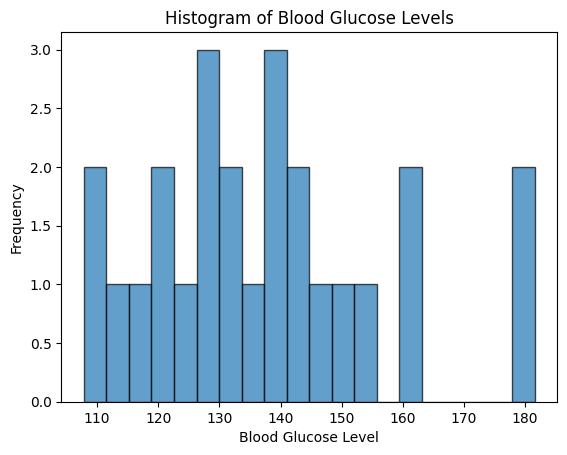

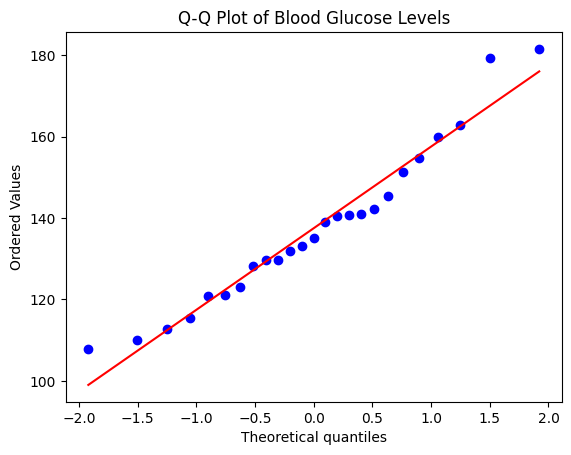

In [168]:
# generating fake data

import pandas as pd
import numpy as np
from faker import Faker

# Initialize Faker
fake = Faker()

# Set a seed for reproducibility
seed = 42
np.random.seed(seed)
Faker.seed(seed)

# Number of samples
n = 100

# Create a DataFrame
df = pd.DataFrame({
    'ID': [fake.uuid4() for _ in range(n)],
    'Blood Glucose': np.concatenate([
        np.random.normal(150, 20, int(n/4)),  # Diabetic & Overweight
        np.random.normal(130, 15, int(n/4)),  # Diabetic & Not Overweight
        np.random.normal(100, 10, int(n/4)),  # Non-diabetic & Overweight
        np.random.normal(90, 7, int(n/4))     # Non-diabetic & Not Overweight
    ]),
    'Diabetic Status': np.concatenate([
        ['Diabetic'] * int(n/2),
        ['Non-diabetic'] * int(n/2)
    ]),
    'Weight Status': np.concatenate([
        ['Overweight', 'Not Overweight'] * int(n/2)
    ])
})

# Shuffle the rows to make it more realistic
df = df.sample(frac=1).reset_index(drop=True)


### checking for normality with Shapiro-Wilk test

## way 2

import scipy.stats as stats

groups = df.groupby(['Diabetic Status', 'Weight Status'])

for (diabetic_status, weight_status), group_df in groups:
    _, p_value = stats.shapiro(group_df['Blood Glucose'])

    print(f"Group ({diabetic_status}, {weight_status}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")


## visualization

import matplotlib.pyplot as plt
import scipy.stats as stats

# For demonstration purposes, let's use one of the subsets:
subset = df[(df['Diabetic Status'] == "Diabetic") & (df['Weight Status'] == "Overweight")]

# Histogram
plt.hist(subset['Blood Glucose'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Blood Glucose Levels')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
stats.probplot(subset['Blood Glucose'], plot=plt)
plt.title('Q-Q Plot of Blood Glucose Levels')
plt.show()

#Interpretation

## 1. Group (Diabetic, Not Overweight): P-value: 0.9399
With a p-value of 0.9399, the blood glucose levels in the "Diabetic, Not Overweight" group do not significantly deviate from a normal distribution. A higher p-value (closer to 1) suggests that the data is likely sampled from a normal distribution.

## 2. Group (Diabetic, Overweight): P-value: 0.3183
With a p-value of 0.3183, the blood glucose levels in the "Diabetic, Overweight" group do not significantly deviate from a normal distribution. Again, the higher the p-value, the more evidence you have against rejecting the null hypothesis (the null hypothesis being that the data is normally distributed).

## 3. Group (Non-diabetic, Not Overweight): P-value: 0.1308
With a p-value of 0.1308, the blood glucose levels in the "Non-diabetic, Not Overweight" group do not significantly deviate from a normal distribution. While this p-value is slightly lower, it is still relatively high, indicating that the data is likely normally distributed.

## 4. Group (Non-diabetic, Overweight): P-value: 0.6069
With a p-value of 0.6069, the blood glucose levels in the "Non-diabetic, Overweight" group do not significantly deviate from a normal distribution. Similar to the other groups, this high p-value suggests that the data is likely sampled from a normal distribution.